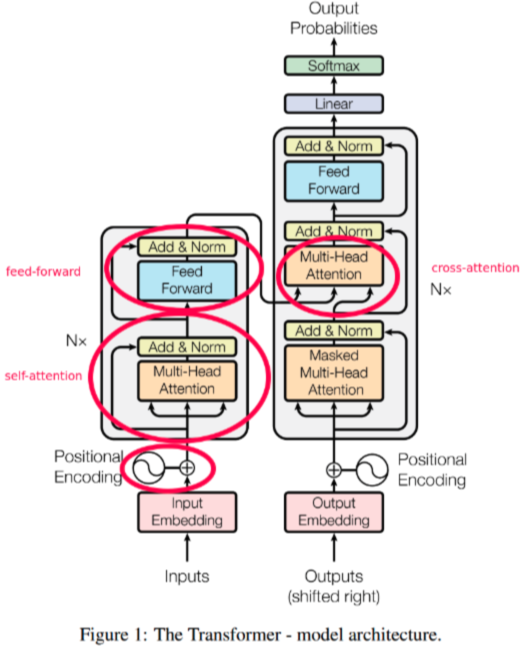

In [30]:
import numpy as np
import math

L, d_k, d_v = 4, 8, 8   ##dimension for the len of the sequences, dim for key vector, dim for value vector
q = np.random.randn(L, d_k) #generate random matrix of shape (L, d_K) using a normal dist
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [31]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[ 1.31996362 -0.71312128  0.68191413  1.6332926  -0.50147669 -0.44085072
   0.92194204  0.79157049]
 [ 0.58296626 -0.62829386 -0.9660738  -1.04596969 -0.19560786 -1.34468626
  -1.07837022  0.51660172]
 [ 1.05288944  0.55337793  0.68481638 -0.60882119 -0.15759008 -1.12193461
   0.83075909 -0.16113381]
 [ 0.34619247 -1.22452605 -0.12575171 -0.54582588  0.14262629  0.81818619
   0.74504492 -0.91684308]]
K
 [[-0.01890932  1.03003986 -1.30379332  0.53165212  2.23439039 -0.53481601
   0.08999736 -0.79990853]
 [-1.11785703 -0.0529919  -1.52082356  0.58952962  0.18838371 -0.34551958
  -0.60699252 -0.9560943 ]
 [-0.15904382 -0.05622977 -0.75488504 -0.64798789 -0.9733868  -0.12584094
  -0.22015576  1.01635179]
 [-0.1212455  -0.18316826 -0.93646366  0.71707398 -1.04097274  0.84724218
   1.2034908  -1.8441308 ]]
V
 [[-0.00606137  0.10411377  2.24680733 -0.56435246 -0.01327466  1.52350833
  -1.1364019   0.64239546]
 [ 2.72484466 -0.92953667  0.04707045 -0.27546331  0.92599181 -0.50653314
   1.2

### self attention formula:
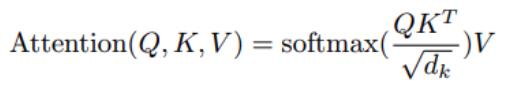


In [32]:
np.matmul(q, k.T) ##Transpose of K #results in  a matrix of size (L,L)

array([[-2.21516689, -2.77051309, -0.59780293,  0.30149083],
       [-0.18291183,  0.82262802,  2.47173919, -2.98708544],
       [-0.21487894, -2.59894988, -0.37310439, -0.79643547],
       [-0.71254574, -0.28411723, -0.87524121,  3.0408494 ]])

In [33]:
# WHy need SQRT??  d_k is the dimension of the key vectors.
q.var(), k.var(), np.matmul(q, k.T).var()
## variance of the dot product is v high

(0.67549841173786, 0.7623673746267541, 2.6860444689033804)

In [34]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(0.67549841173786, 0.7623673746267541, 0.3357555586129225)

In [35]:
scaled  #lower variance

array([[-0.78317976, -0.9795243 , -0.21135525,  0.10659311],
       [-0.0646691 ,  0.29084292,  0.87389177, -1.05609419],
       [-0.07597118, -0.91886754, -0.13191232, -0.28158246],
       [-0.25192296, -0.10045061, -0.3094445 ,  1.07510262]])

### MASKING
- ensure words don't get context from future generated words
- not required in encoders but required in **Decoders**

In [36]:
mask = np.tril(np.ones( (L, L) ))  #creates triangular matrix
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

## ensures that for any given token position i, it can only attend to token positions ≤ 𝑖 and not to any positions >i.

In [37]:
mask[mask == 0] = -np.infty


In [38]:
mask

array([[  1., -inf, -inf, -inf],
       [  1.,   1., -inf, -inf],
       [  1.,   1.,   1., -inf],
       [  1.,   1.,   1.,   1.]])

In [40]:
mask[mask == 1] = 0
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [41]:
scaled + mask

array([[-0.78317976,        -inf,        -inf,        -inf],
       [-0.0646691 ,  0.29084292,        -inf,        -inf],
       [-0.07597118, -0.91886754, -0.13191232,        -inf],
       [-0.25192296, -0.10045061, -0.3094445 ,  1.07510262]])

### SOFTMAX
- used to convert a vector to a probability distribution so their values add up to 1
  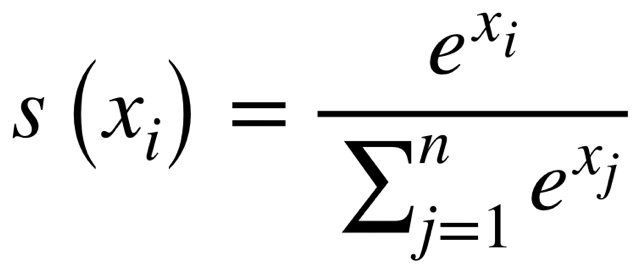

In [43]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis = -1)).T

In [44]:
attention = softmax(scaled + mask)
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.41204641, 0.58795359, 0.        , 0.        ],
       [0.42086537, 0.18116653, 0.3979681 , 0.        ],
       [0.14540249, 0.1691825 , 0.13727472, 0.54814029]])

In [45]:
new_v = np.matmul(attention, v)
new_v

array([[-0.00606137,  0.10411377,  2.24680733, -0.56435246, -0.01327466,
         1.52350833, -1.1364019 ,  0.64239546],
       [ 1.59958463, -0.50362472,  0.95346414, -0.39449905,  0.53897043,
         0.32993816,  0.23802486,  0.19735472],
       [ 1.03516882,  0.05292834,  1.31711524, -0.41159167,  0.2400136 ,
         0.97069607, -0.71835226,  0.49130186],
       [ 1.11101375, -0.14744162,  0.82054045,  0.13899099, -0.32102588,
        -0.06421266,  0.19733272,  0.8279042 ]])

In [47]:
def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]   # access the size of the last dimension of an array
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    out = np.matmul(attention, v)
    return out, attention


In [48]:
values, attention = scaled_dot_product_attention(q, k, v, mask=None)

In [50]:
print("values\n", values)
print("attention\n", attention)

values
 [[ 1.11355765 -0.02739437  0.91297242  0.00590365 -0.18882558  0.24032278
  -0.12903136  0.76349528]
 [ 1.43631115 -0.02373402  0.9132373  -0.28852461  0.27413963  0.6112777
  -0.40110422  0.46417431]
 [ 0.98666041  0.00843691  1.14890806 -0.16199738 -0.05524241  0.56218354
  -0.38733598  0.6780947 ]
 [ 1.11101375 -0.14744162  0.82054045  0.13899099 -0.32102588 -0.06421266
   0.19733272  0.8279042 ]]
attention
 [[0.16589795 0.13632317 0.2938876  0.40389128]
 [0.18676722 0.26650022 0.47743304 0.06929952]
 [0.31345936 0.13493232 0.29640554 0.25520278]
 [0.14540249 0.1691825  0.13727472 0.54814029]]
